In [ ]:
!pip install tensorflow keras keras-facenet

In [ ]:
pip install mtcnn opencv-python

In [ ]:
import tensorflow
from mtcnn import MTCNN
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import pickle
from keras_facenet import FaceNet

In [ ]:
model = load_model('/content/drive/MyDrive/model.h5')
detector = MTCNN()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
facenet = FaceNet()

label_dict={
    0:"angry",
    1:"happy",
    2:"natural",
    3:"sad"}

def predict_face(face_embedding):
    face_embedding = face_embedding.flatten().reshape(1, -1)
    prediction = svm_model.predict(face_embedding)
    proba = svm_model.predict_proba(face_embedding)
    predicted_label = label_encoder.inverse_transform(prediction)[0]
    confidence = np.max(proba)
    return predicted_label, confidence


with open("/content/drive/MyDrive/svm_model_3.pkl", "rb") as model_file:
    svm_model = pickle.load(model_file)

with open("/content/drive/MyDrive/label_encoder_3.pkl", "rb") as label_file:
    label_encoder = pickle.load(label_file)


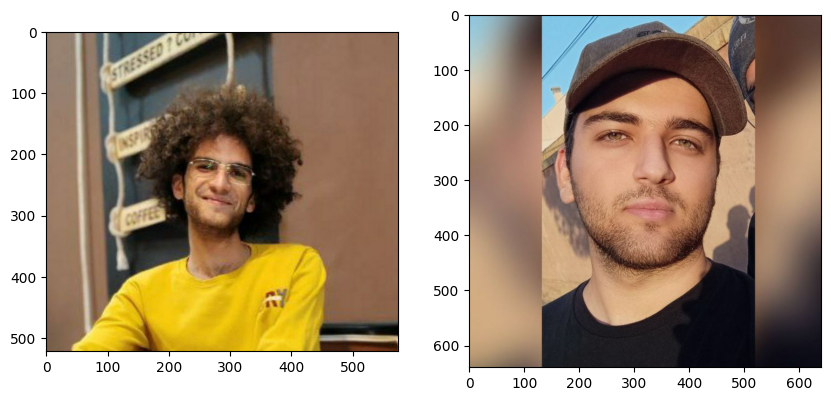

In [ ]:
image_path1='/content/drive/MyDrive/person_dataset/person_dataset/IMG_20250203_203910_461.jpg'
image_path2='/content/drive/MyDrive/person/person_dataset/IMG_20250203_203813_437.jpg'
images=[image_path1,image_path2]


img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)

image_rgb1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image_rgb1)
image_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(image_rgb2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


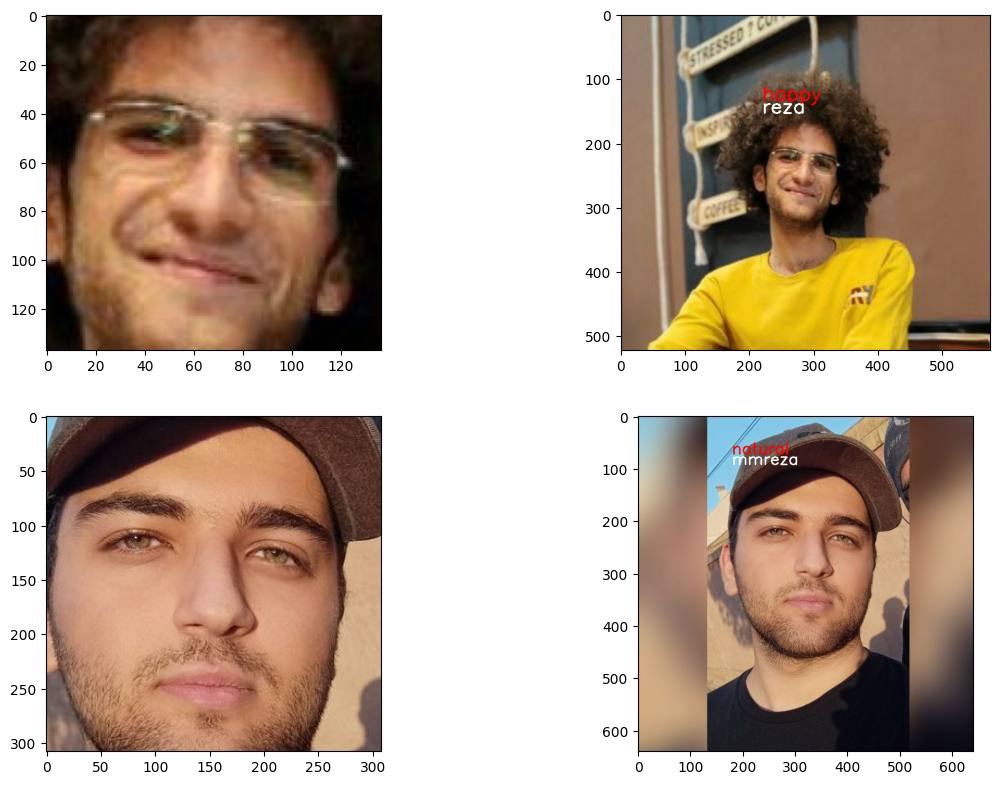

In [ ]:
predict=[]
for img in images:
  image=cv2.imread(img)
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  for (x, y, w, h) in faces:
      face_crop1=image[y:y+h,x:x+w]
      #cv2.rectangle(frame,)
      if face_crop1 is not None:
        face_resized_48 = cv2.resize(face_crop1, (48, 48))
        face_array1 = np.expand_dims(face_resized_48, axis=0)
        prediction=model.predict(face_array1)
        emotion=label_dict.get(np.argmax(prediction))

        rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        faces2 = detector.detect_faces(rgb_frame)
        for face in faces2:
          x, y, width, height = face['box']
          face_crop = image[y:y + height, x:x + width]

          if face_crop is not None:

           face_crop = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
           face_resized_160 = cv2.resize(face_crop, (160, 160))
           face_array2= np.expand_dims(face_resized_160, axis=0)

           if face_array2 is not None:
             face_embedding = facenet.embeddings(face_array2)
             predicted_name, confidence = predict_face(face_embedding)
           cv2.putText(image, emotion, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
           cv2.putText(image, predicted_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
      predict.append(face_crop1)
      predict.append(image)


plt.figure(figsize=(14, 20))
for index, img in enumerate(predict):
  imgrgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.subplot(len(predict),2, index+1)
  plt.imshow(imgrgb)

